In [1]:
import pandas as pd

# Load the dataset
file_path = "House Price Prediction Dataset.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


(None,
    Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
 0   1  1360         5          4       3       1970  Downtown  Excellent   
 1   2  4272         5          4       3       1958  Downtown  Excellent   
 2   3  3592         2          2       3       1938  Downtown       Good   
 3   4   966         4          2       2       1902  Suburban       Fair   
 4   5  4926         1          4       2       1975  Downtown       Fair   
 
   Garage   Price  
 0     No  149919  
 1     No  424998  
 2     No  266746  
 3    Yes  244020  
 4    Yes  636056  )

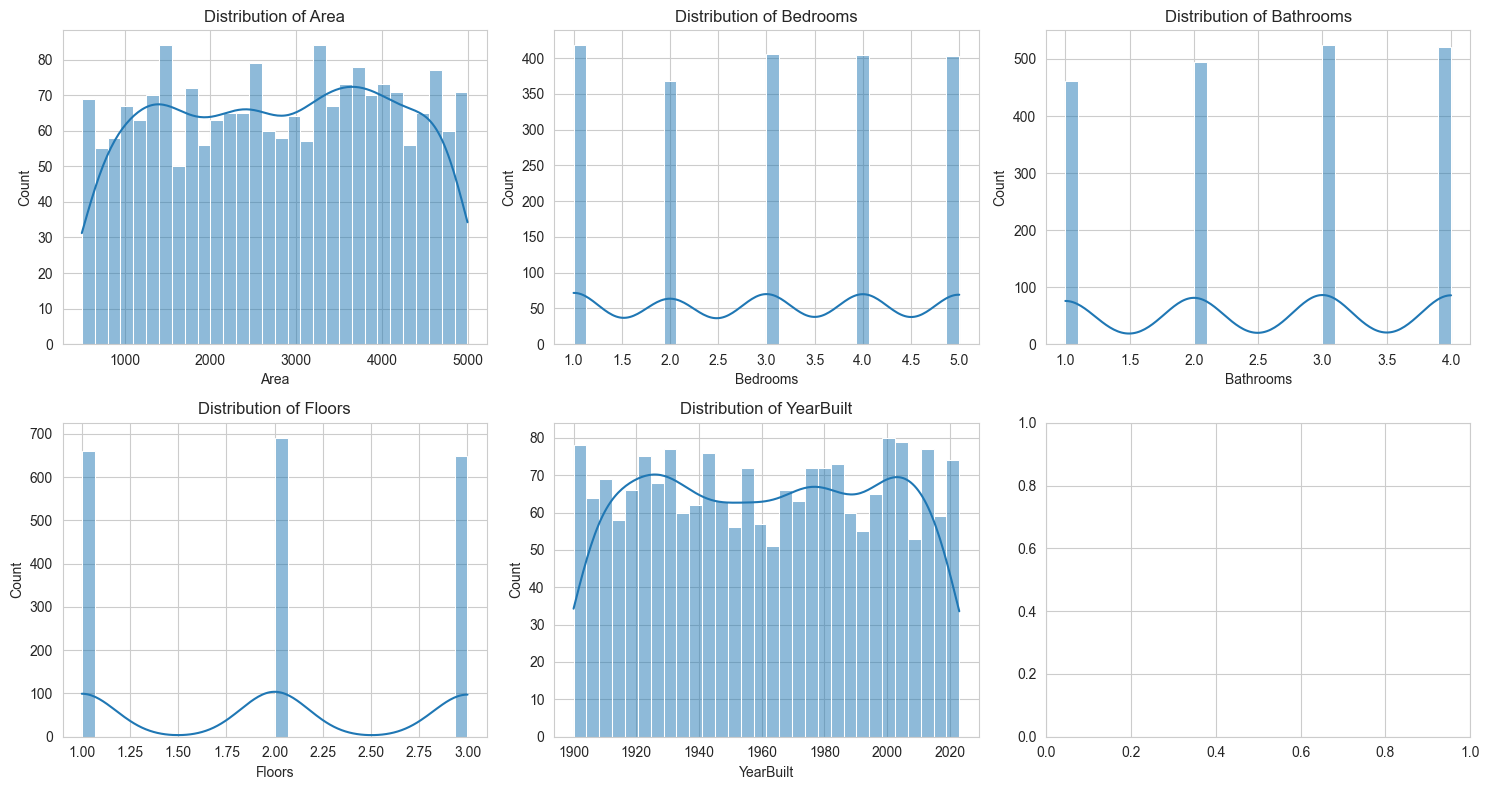

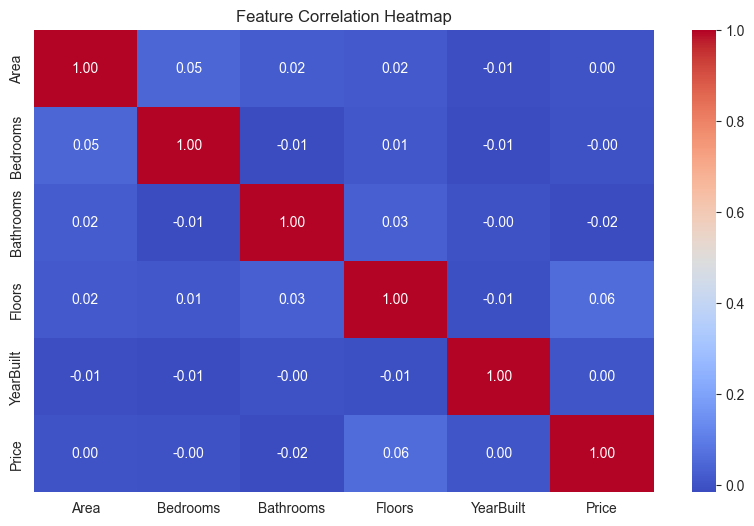

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot distributions of numerical features
df_numeric = df.drop(columns=["Id", "Location", "Condition", "Garage"])

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns[:-1]):  # Exclude 'Price'
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=["Location", "Condition", "Garage"], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
num_features = ["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt"]
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

# Drop the 'Id' column as it's not needed
df_encoded.drop(columns=["Id"], inplace=True)

# Display processed dataset sample
df_encoded.head()


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,-1.101471,1.401791,1.305568,1.244151,0.238155,149919,False,False,False,False,False,False,False
1,1.147485,1.401791,1.305568,1.244151,-0.095942,424998,False,False,False,False,False,False,False
2,0.622317,-0.704581,-0.498326,1.244151,-0.652770,266746,False,False,False,False,True,False,False
3,-1.405759,0.699667,-0.498326,0.008035,-1.655061,244020,False,True,False,True,False,False,True
4,1.652574,-1.406705,1.305568,0.008035,0.377363,636056,False,False,False,True,False,False,True


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

# Split dataset
X = df_encoded.drop(columns=["Price"])
y = df_encoded["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Save model
model_path = "house_price_model.pkl"
joblib.dump(rf_model, model_path)

mae, rmse, r2, model_path


(252477.50920000003,
 292024.36319146294,
 -0.09613769666939098,
 'house_price_model.pkl')